# UE19CS345 – NETWORK ANALYSIS AND MINING 
# Lab Evaluation 02 

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('got-s4-edges.csv')
df2 = pd.read_csv('got-s4-nodes.csv')

In [2]:
import os.path as osp
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
import networkx as nx
from sklearn.preprocessing import OneHotEncoder
from torch_geometric.utils.convert import from_networkx 
from torch_geometric.transforms import RandomNodeSplit as masking
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score, roc_curve, auc

from torch_geometric.utils import negative_sampling
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv,SAGEConv,GATConv
from torch_geometric.utils import train_test_split_edges

In [3]:
from scipy.sparse import coo_matrix
from scipy.sparse import coo_array

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import matplotlib.patches as mpatches
import random
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from itertools import count 

In [ ]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
import community.community_louvain
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import k_clique_communities

<b> 1) Load the dataset from the CSVs into NetworkX to create an undirected graph. <b>

In [6]:
G = nx.from_pandas_edgelist(df,
                            'Source',
                            'Target',
                             create_using=nx.Graph(),
                            edge_attr='Weight'# For Directed Route arrows
                           ) 

In [7]:
print(G)

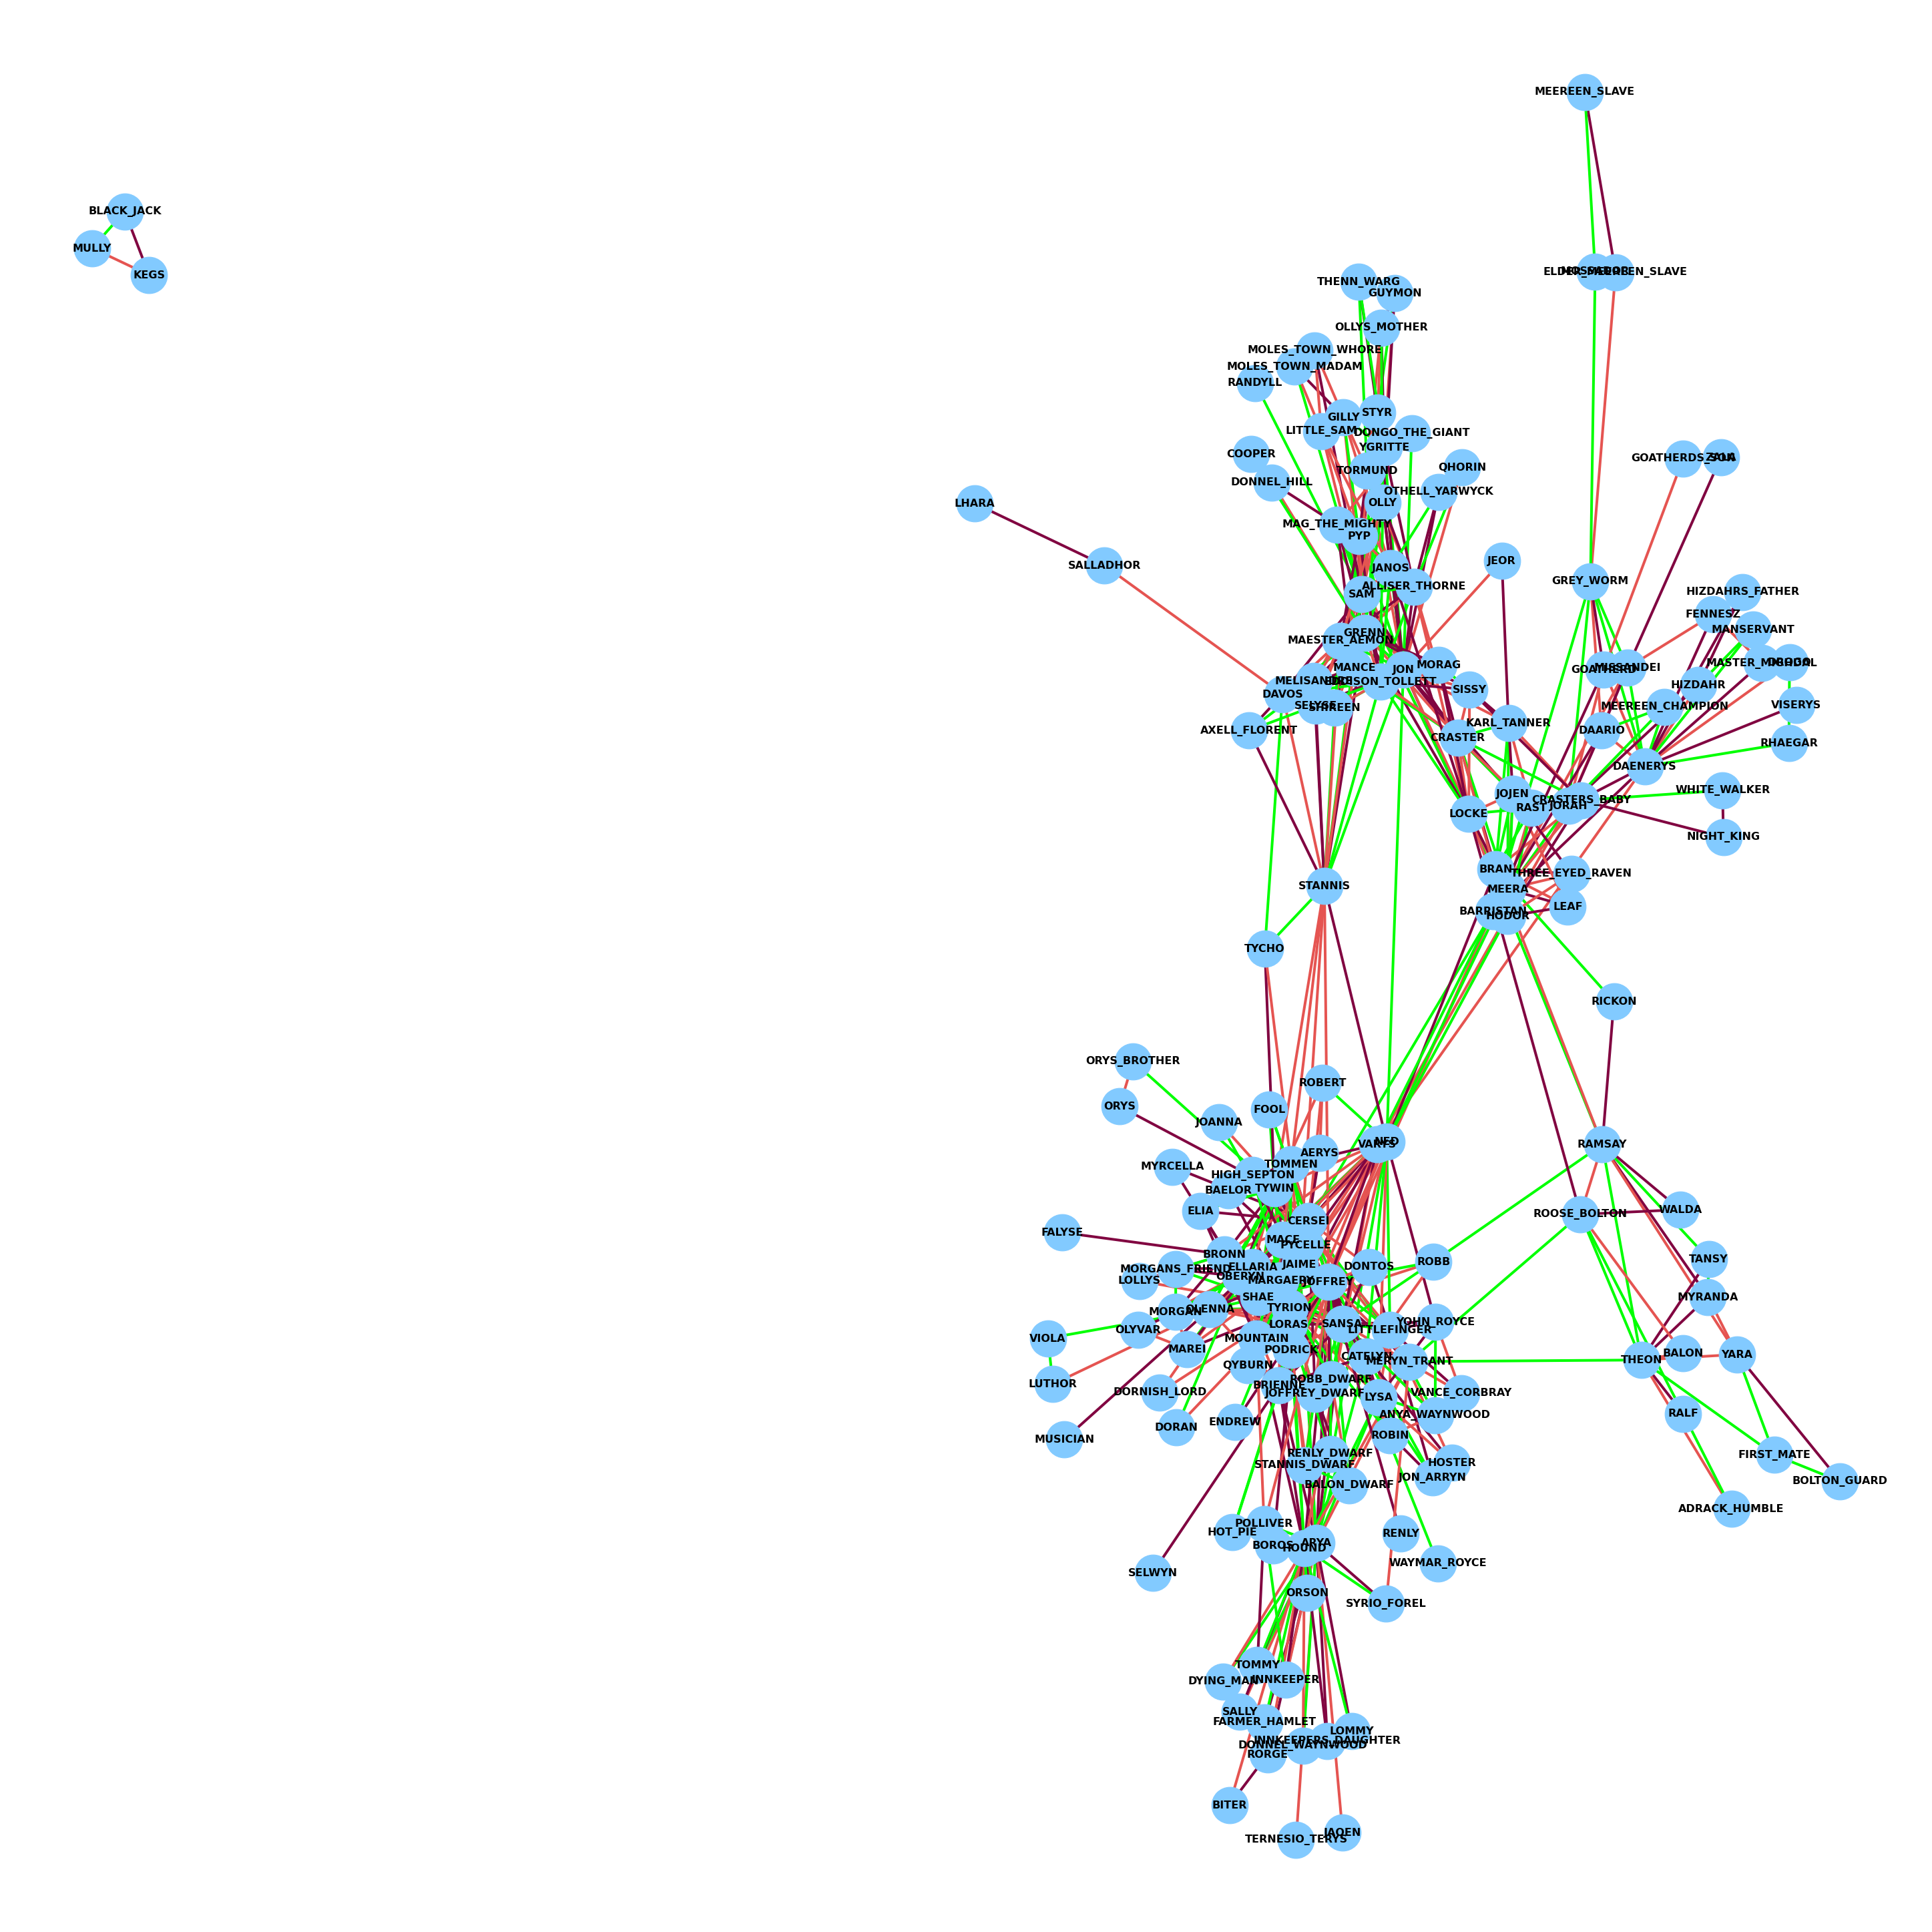

In [8]:
plt.figure( figsize=(40, 40)
          )

nx.draw(G,
        with_labels=True,
        node_size= 3000,#k=200,
        node_color='#82CAFF',##00b4d9
        font_size=16,
        font_weight ='bold',
        font_color='black',
        edge_color = ('#E55451','#810541','#00FF00'),
        node_shape='o',
        width=4  #Show arrow From and To
       )

<b> 2) Perform EDA on the dataset <b>

Checking for isolates and self loops:

In [9]:
list(nx.isolates(G))

[]

In [10]:
def has_self_loop(G: nx.Graph, node):
    try:
        if G[node][node] != None:
            return True
    except Exception:
        return False

[print(node, "has self loop") for node in G.nodes() if has_self_loop(G, node) == True]

[]

In [11]:
len(G)

172

In [12]:
G.edges(data=True)


EdgeDataView([('ARYA', 'HOUND', {'Weight': 162}), ('ARYA', 'BRIENNE', {'Weight': 36}), ('ARYA', 'POLLIVER', {'Weight': 19}), ('ARYA', 'TERNESIO_TERYS', {'Weight': 17}), ('ARYA', 'FARMER_HAMLET', {'Weight': 13}), ('ARYA', 'DYING_MAN', {'Weight': 10}), ('ARYA', 'SALLY', {'Weight': 6}), ('ARYA', 'RORGE', {'Weight': 4}), ('ARYA', 'CATELYN', {'Weight': 3}), ('ARYA', 'HOT_PIE', {'Weight': 3}), ('ARYA', 'JOFFREY', {'Weight': 3}), ('ARYA', 'NED', {'Weight': 3}), ('ARYA', 'PODRICK', {'Weight': 3}), ('ARYA', 'SANSA', {'Weight': 3}), ('ARYA', 'DONNEL_WAYNWOOD', {'Weight': 2}), ('ARYA', 'INNKEEPER', {'Weight': 2}), ('ARYA', 'INNKEEPERS_DAUGHTER', {'Weight': 2}), ('ARYA', 'JAIME', {'Weight': 2}), ('ARYA', 'JAQEN', {'Weight': 2}), ('ARYA', 'LOMMY', {'Weight': 2}), ('ARYA', 'LYSA', {'Weight': 2}), ('ARYA', 'MERYN_TRANT', {'Weight': 2}), ('ARYA', 'SYRIO_FOREL', {'Weight': 2}), ('ARYA', 'TOMMY', {'Weight': 2}), ('HOUND', 'POLLIVER', {'Weight': 29}), ('HOUND', 'BRIENNE', {'Weight': 22}), ('HOUND', 'FARM

In [13]:
# for node_name in node_list:
#         labels[str(node_name)] =str(node_name)
#     nx.draw_networkx_labels(G,pos,labels,font_size=16)

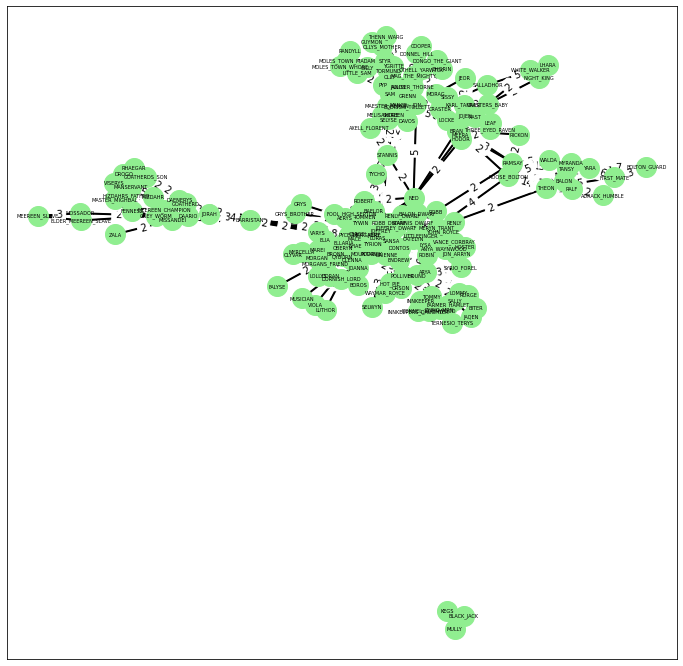

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 400, font_size=5, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos,width=2,edge_cmap=plt.cm.Blues)
edge_labels = nx.get_edge_attributes(G, 'Weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plot = plt.show()
#plot.savefig("graph.pdf")
plt.savefig("sgraph.pdf")

In [15]:
max(G, key=G.degree)

'JOFFREY'

In [16]:
min(G, key=G.degree)

'TERNESIO_TERYS'

In [17]:
list(G.neighbors('TYRION'))

['JAIME',
 'TYWIN',
 'BRONN',
 'PODRICK',
 'OBERYN',
 'SHAE',
 'JOFFREY',
 'SANSA',
 'CERSEI',
 'VARYS',
 'MACE',
 'TOMMEN',
 'ELLARIA',
 'MARGAERY',
 'DORNISH_LORD',
 'MERYN_TRANT',
 'ORSON',
 'PYCELLE',
 'BRIENNE',
 'DONTOS',
 'LYSA',
 'MOUNTAIN',
 'OLENNA',
 'MORGAN',
 'AERYS',
 'CATELYN',
 'DORAN',
 'LITTLEFINGER',
 'LORAS',
 'NED',
 'BAELOR',
 'JOFFREY_DWARF',
 'LOLLYS',
 'MAREI',
 'MORGANS_FRIEND',
 'ROBB',
 'ROBB_DWARF',
 'ROBIN']

In [18]:
#node with greatest weighted degree using the build-in max function

wdegree = dict(G.degree(weight='weight'))
max(G, key=wdegree.get)

'JOFFREY'

In [19]:
s='\n The graph details: '
print (s)


a=G.number_of_nodes()
s='\n The no of nodes: ' +repr(a)
print (s)

a= G.number_of_edges()
s='\n The no of edges: ' +repr(a)
print (s)


#THIS SEEMS WRONG, ILL FIX LATER

deg=nx.degree(G)
a= min(deg)
s='\n The min degree: ' +repr(a)
print (s)

deg=nx.degree(G)
a = max(deg)
s='\n The max degree: ' +repr(a)
print (s)



 The graph details: 

 The no of nodes: 172

 The no of edges: 667

 The min degree: ('ADRACK_HUMBLE', 2)

 The max degree: ('ZALA', 1)


<b> 3) Graph Measures <b>

Degree Centrality:

In [20]:
from operator import itemgetter
degc = nx.degree_centrality(G)
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('JOFFREY', 0.23391812865497075),
 ('TYRION', 0.2222222222222222),
 ('CERSEI', 0.19298245614035087),
 ('SANSA', 0.18128654970760233),
 ('JON', 0.17543859649122806),
 ('JAIME', 0.1695906432748538),
 ('TYWIN', 0.16374269005847952),
 ('SAM', 0.14619883040935672),
 ('OBERYN', 0.14619883040935672),
 ('ARYA', 0.14035087719298245),
 ('GRENN', 0.12280701754385964),
 ('HOUND', 0.11695906432748537),
 ('ELLARIA', 0.10526315789473684),
 ('STANNIS', 0.09941520467836257),
 ('MARGAERY', 0.09941520467836257),
 ('EDDISON_TOLLETT', 0.09941520467836257),
 ('VARYS', 0.09941520467836257),
 ('MACE', 0.09941520467836257),
 ('NED', 0.09941520467836257),
 ('DAENERYS', 0.0935672514619883),
 ('PODRICK', 0.0935672514619883),
 ('BRIENNE', 0.0935672514619883),
 ('TOMMEN', 0.0935672514619883),
 ('LOCKE', 0.0935672514619883),
 ('CRASTER', 0.0935672514619883),
 ('BRONN', 0.08771929824561403),
 ('BRAN', 0.08771929824561403),
 ('LITTLEFINGER', 0.08187134502923976),
 ('ALLISER_THORNE', 0.08187134502923976),
 ('OLENNA', 

Betweeness Centrality:

In [21]:
bet = nx.betweenness_centrality(G)
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('JOFFREY', 0.20477266691678095),
 ('NED', 0.193769508270157),
 ('STANNIS', 0.17791068164690788),
 ('JON', 0.14557527344371873),
 ('VARYS', 0.10827589172571388),
 ('BARRISTAN', 0.10274916276058584),
 ('ARYA', 0.09637296710729365),
 ('DAENERYS', 0.0923493660537757),
 ('TYRION', 0.09095759740305433),
 ('JAIME', 0.0766255075987121),
 ('MERYN_TRANT', 0.07375535383424282),
 ('CERSEI', 0.0737017488917295),
 ('SAM', 0.0727236004993753),
 ('TYWIN', 0.06842063881797897),
 ('SANSA', 0.05351113453863404),
 ('HOUND', 0.0515343870387271),
 ('BRAN', 0.05049654822774954),
 ('THEON', 0.04893603955868328),
 ('RAMSAY', 0.04155136278967185),
 ('GRENN', 0.036447208119043305),
 ('LOCKE', 0.03476886137321412),
 ('OLENNA', 0.03429180497291953),
 ('GREY_WORM', 0.034083247334021335),
 ('ROOSE_BOLTON', 0.02681746512773452),
 ('DAVOS', 0.025455106612484048),
 ('CRASTERS_BABY', 0.02298783378003921),
 ('BRIENNE', 0.022397154266252613),
 ('OBERYN', 0.020822098705901588),
 ('MEERA', 0.02060151626284794),
 ('ROBB', 

Edge Betweeness Centrality:

In [ ]:
ebc=nx.edge_betweenness_centrality(G, normalized=True, weight=None)
ebl=sorted(ebc.items(),
       key=lambda i: i[1],
       reverse=True)#[:5]
s='\n Top 5 edge betweenness centrality   :\n'
print (s)
for item in ebl:
    s= repr(item) + ','
    print (s)



Sorted PageRank:

In [23]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print (sorted(pgr.items(), key=itemgetter(1), reverse=True))




 sorted pagerank:

[('JOFFREY', 0.024326054851833624), ('TYRION', 0.02309747447173319), ('CERSEI', 0.019692270734802113), ('ARYA', 0.019412494308063626), ('SANSA', 0.018478204850729204), ('JON', 0.018319882643906587), ('DAENERYS', 0.018121961090233986), ('JAIME', 0.017699368621287452), ('TYWIN', 0.017106409301290443), ('HOUND', 0.01605953858810656), ('SAM', 0.015509719611437753), ('OBERYN', 0.015009107575932797), ('GRENN', 0.012935201816523207), ('THEON', 0.010832111013589243), ('VARYS', 0.010768378929954173), ('BRIENNE', 0.010490175828368833), ('ELLARIA', 0.010488816657955008), ('NED', 0.010287669672752246), ('LOCKE', 0.010131890669587966), ('STANNIS', 0.010033740362216392), ('BRAN', 0.010015824972874832), ('OLENNA', 0.0099183582313103), ('EDDISON_TOLLETT', 0.00990807806910975), ('BRONN', 0.009797031787238675), ('CRASTER', 0.00978928591700882), ('MARGAERY', 0.009772232926393181), ('PODRICK', 0.009718972440116611), ('MACE', 0.009693482123678243), ('RAMSAY', 0.009464781636926559), ('TO

In [24]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)



Nodes:  172
Edges:  667
Average degree:  3.877906976744186


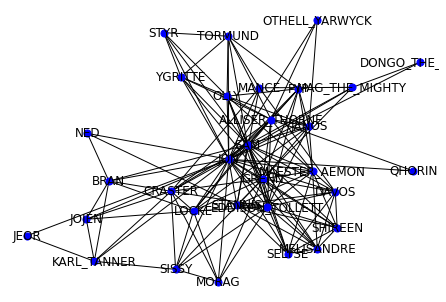

In [25]:
s='JON'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=True)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
#plt.savefig('Jon.png')
plt.show()
nx.write_gml(hub_ego,"egonw_medici.gml")

Local clustering coefficient:

In [26]:
print(nx.clustering(G))

{'ARYA': 0.17753623188405798, 'HOUND': 0.16842105263157894, 'JAIME': 0.37192118226600984, 'TYRION': 0.26458036984352773, 'CERSEI': 0.3181818181818182, 'DAENERYS': 0.2, 'JORAH': 0.5277777777777778, 'TYWIN': 0.35978835978835977, 'LITTLEFINGER': 0.43956043956043955, 'SANSA': 0.35053763440860214, 'JON': 0.2620689655172414, 'SAM': 0.33, 'LYSA': 0.47435897435897434, 'BRONN': 0.49523809523809526, 'PODRICK': 0.6416666666666667, 'GILLY': 0.5, 'OBERYN': 0.42, 'BRIENNE': 0.49166666666666664, 'SHAE': 0.7727272727272727, 'ALLISER_THORNE': 0.5494505494505495, 'JOFFREY': 0.2551282051282051, 'MISSANDEI': 0.5357142857142857, 'RAMSAY': 0.2222222222222222, 'THEON': 0.24444444444444444, 'DAARIO': 0.8, 'GRENN': 0.40476190476190477, 'DAVOS': 0.5384615384615384, 'STANNIS': 0.3897058823529412, 'GREY_WORM': 0.5357142857142857, 'MANCE': 0.4, 'ELLARIA': 0.5751633986928104, 'BRAN': 0.41904761904761906, 'MEERA': 0.6181818181818182, 'MARGAERY': 0.6691176470588235, 'OLENNA': 0.5714285714285714, 'ROBIN': 0.7333333333

In [27]:
print(nx.average_clustering(G))

0.6723267270224368


<b> 4) Find communities using Spectral Clustering <b>

In [28]:
# Class to perform spectral clustering for k clusters, given k

class SpectralClustering:
    
    def __init__(self, G):
        # Initialize the graph, nodes and the normalized Laplacian

        self.graph = G
        self.normalized_laplacian = nx.linalg.normalized_laplacian_matrix(G).toarray()
        self.nodes = G.nodes()

    def compute_eigenspace(self):
        # Compute the eigenvalues and the eigenvectors using Numpy and sort them in ascending order 

        eigenvalues, eigenvectors = np.linalg.eig(self.normalized_laplacian)

        sort_index = np.argsort(eigenvalues) # Returns the list of indices that would sort the array
        sorted_eigenvectors = eigenvectors[:, sort_index]

        return sorted_eigenvectors

    def fit(self, k):
        """
        Step 1: Extract the k eigen vectors and stack them vertically to form a matrix (i.e each vector is a column)
        Step 2: Every row of this matrix represents the features of the respective nodes of the graph
        Step 3: Perform K-Means clustering on this dataset to identify k clusters

        """
        eigenvectors = self.compute_eigenspace()
        k_eigenvectors = np.array(eigenvectors)[:,:k]
        dataset = pd.DataFrame(k_eigenvectors, index=self.nodes)

        # print(dataset)

        k_means_clusters = KMeans(n_clusters = k, random_state=42)
        self.clusters = k_means_clusters.fit(k_eigenvectors)
        
    def predict_labels(self):
        # Returns the labels 
        return self.clusters.labels_

    def assign_labels(self, labels):
        # Helper to assign the labels as node attributes
        for i,node in enumerate(self.graph.nodes()):
            self.graph.nodes[node]['label'] = labels[i]

    def plot_graph(self, n_clusters, title='Graph after Spectral Clustering'):
        # Plots the graph 

        labels = self.clusters.labels_
        self.assign_labels(labels)

        colour_list = ['blue','green','red','yellow','cyan', 'magenta','lightblue','grey']
        sampled_colours = dict(zip(set(labels),random.sample(colour_list, n_clusters)))

        legend_handles = []
        for label, color in sampled_colours.items():
            colour_handle = mpatches.Patch(color=color, label=label)
            legend_handles.append(colour_handle)

        colours = [sampled_colours[i] for i in labels]

        pos_fr = nx.fruchterman_reingold_layout(self.graph)
        plt.figure(figsize=(8,8))
        plt.title(title)
        plt.legend(handles=legend_handles)
        nx.draw(self.graph, pos=pos_fr, node_size=500, node_color=colours, with_labels=True)
        plt.show()

In [29]:
cliques = list(nx.find_cliques(G))
[clique for clique in cliques if len(clique) > 5]

[['OLLY', 'SAM', 'JON', 'ALLISER_THORNE', 'YGRITTE', 'GRENN'],
 ['OLLY', 'SAM', 'JON', 'ALLISER_THORNE', 'YGRITTE', 'TORMUND'],
 ['OLLY',
  'SAM',
  'JON',
  'ALLISER_THORNE',
  'PYP',
  'MAESTER_AEMON',
  'JANOS',
  'GRENN',
  'EDDISON_TOLLETT'],
 ['OLLY', 'SAM', 'JON', 'ALLISER_THORNE', 'PYP', 'TORMUND'],
 ['OLLY', 'SAM', 'JON', 'STYR', 'YGRITTE', 'TORMUND'],
 ['DAENERYS', 'JORAH', 'BARRISTAN', 'GREY_WORM', 'MISSANDEI', 'GOATHERD'],
 ['DAENERYS', 'JORAH', 'BARRISTAN', 'GREY_WORM', 'MISSANDEI', 'DAARIO'],
 ['MELISANDRE',
  'DAVOS',
  'SELYSE',
  'STANNIS',
  'MAESTER_AEMON',
  'SAM',
  'JON',
  'GRENN',
  'SHIREEN',
  'EDDISON_TOLLETT'],
 ['CRASTER', 'LOCKE', 'MEERA', 'BRAN', 'JOJEN', 'RAST', 'HODOR'],
 ['CRASTER', 'LOCKE', 'JON', 'GRENN', 'EDDISON_TOLLETT', 'MORAG', 'SISSY'],
 ['CRASTER',
  'LOCKE',
  'JON',
  'GRENN',
  'EDDISON_TOLLETT',
  'ALLISER_THORNE',
  'SAM'],
 ['CRASTER', 'CRASTERS_BABY', 'JOJEN', 'RAST', 'MEERA', 'BRAN', 'KARL_TANNER'],
 ['CRASTER', 'CRASTERS_BABY', 'JOJEN

In [30]:
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['ADRACK_HUMBLE',
  'ALLISER_THORNE',
  'AXELL_FLORENT',
  'BALON',
  'BOLTON_GUARD',
  'BRAN',
  'COOPER',
  'CRASTER',
  'CRASTERS_BABY',
  'DAVOS',
  'DONGO_THE_GIANT',
  'DONNEL_HILL',
  'EDDISON_TOLLETT',
  'FIRST_MATE',
  'GILLY',
  'GRENN',
  'GUYMON',
  'HODOR',
  'JANOS',
  'JEOR',
  'JOJEN',
  'JON',
  'KARL_TANNER',
  'LEAF',
  'LHARA',
  'LITTLE_SAM',
  'LOCKE',
  'MAESTER_AEMON',
  'MAG_THE_MIGHTY',
  'MANCE',
  'MEERA',
  'MELISANDRE',
  'MOLES_TOWN_MADAM',
  'MOLES_TOWN_WHORE',
  'MORAG',
  'MYRANDA',
  'NIGHT_KING',
  'OLLY',
  'OLLYS_MOTHER',
  'OTHELL_YARWYCK',
  'PYP',
  'QHORIN',
  'RALF',
  'RAMSAY',
  'RANDYLL',
  'RAST',
  'RICKON',
  'ROOSE_BOLTON',
  'SALLADHOR',
  'SAM',
  'SELYSE',
  'SHIREEN',
  'SISSY',
  'STANNIS',
  'STYR',
  'TANSY',
  'THENN_WARG',
  'THEON',
  'THREE_EYED_RAVEN',
  'TORMUND',
  'TYCHO',
  'WALDA',
  'WHITE_WALKER',
  'YARA',
  'YGRITTE'],
 ['AERYS',
  'ANYA_WAYNWOOD',
  'ARYA',
  'BAELOR',
  'BALON_DWARF',
  'BITER',
  'BOROS',
  'BRI

In [31]:
part = community.community_louvain.best_partition(G)
print(part)

{'ARYA': 0, 'HOUND': 0, 'JAIME': 5, 'TYRION': 5, 'CERSEI': 5, 'DAENERYS': 2, 'JORAH': 2, 'TYWIN': 5, 'LITTLEFINGER': 3, 'SANSA': 5, 'JON': 4, 'SAM': 4, 'LYSA': 3, 'BRONN': 5, 'PODRICK': 5, 'GILLY': 4, 'OBERYN': 5, 'BRIENNE': 5, 'SHAE': 5, 'ALLISER_THORNE': 4, 'JOFFREY': 5, 'MISSANDEI': 2, 'RAMSAY': 1, 'THEON': 1, 'DAARIO': 2, 'GRENN': 4, 'DAVOS': 4, 'STANNIS': 4, 'GREY_WORM': 2, 'MANCE': 4, 'ELLARIA': 5, 'BRAN': 7, 'MEERA': 7, 'MARGAERY': 5, 'OLENNA': 5, 'ROBIN': 3, 'HODOR': 7, 'JOJEN': 7, 'TOMMEN': 5, 'EDDISON_TOLLETT': 4, 'JANOS': 4, 'ROOSE_BOLTON': 1, 'MELISANDRE': 4, 'SELYSE': 4, 'TORMUND': 4, 'BARRISTAN': 2, 'VARYS': 5, 'PYP': 4, 'STYR': 4, 'YGRITTE': 4, 'DONTOS': 5, 'YOHN_ROYCE': 3, 'POLLIVER': 0, 'PYCELLE': 5, 'SHIREEN': 4, 'MAESTER_AEMON': 4, 'HIZDAHR': 2, 'MOLES_TOWN_WHORE': 4, 'HOT_PIE': 5, 'ANYA_WAYNWOOD': 3, 'LOCKE': 4, 'MACE': 5, 'OLYVAR': 5, 'FARMER_HAMLET': 0, 'LITTLE_SAM': 4, 'YARA': 1, 'QYBURN': 5, 'TYCHO': 4, 'MORGAN': 5, 'MOUNTAIN': 5, 'RALF': 1, 'TERNESIO_TERYS': 0,

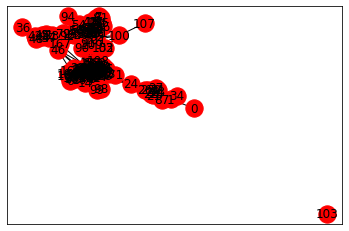

In [32]:
synthetic = nx.make_max_clique_graph(G)  

nx.draw_networkx(synthetic,node_color='red')

In [33]:
c = list(k_clique_communities(G, 3))
print(c)

[frozenset({'MOSSADOR', 'GREY_WORM', 'MEEREEN_SLAVE', 'ELDER_MEEREEN_SLAVE'}), frozenset({'SAM', 'LORAS', 'MACE', 'FOOL', 'HIZDAHRS_FATHER', 'COOPER', 'YOHN_ROYCE', 'MOLES_TOWN_WHORE', 'BITER', 'PODRICK', 'OLLY', 'ROBIN', 'STANNIS', 'GILLY', 'DAENERYS', 'STANNIS_DWARF', 'WALDA', 'DAVOS', 'MELISANDRE', 'OLYVAR', 'LITTLEFINGER', 'MORGANS_FRIEND', 'GOATHERD', 'MANSERVANT', 'JOANNA', 'DYING_MAN', 'PYP', 'BOLTON_GUARD', 'AERYS', 'DONTOS', 'FIRST_MATE', 'MASTER_MIGHDAL', 'BRIENNE', 'MORAG', 'INNKEEPER', 'ROBB', 'THENN_WARG', 'FENNESZ', 'HIGH_SEPTON', 'VANCE_CORBRAY', 'SHIREEN', 'TYWIN', 'RICKON', 'MOLES_TOWN_MADAM', 'THEON', 'CRASTER', 'SALLY', 'ANYA_WAYNWOOD', 'ROBB_DWARF', 'YGRITTE', 'THREE_EYED_RAVEN', 'MAESTER_AEMON', 'RORGE', 'TYCHO', 'BAELOR', 'BRONN', 'JON', 'MYRCELLA', 'ROOSE_BOLTON', 'MAREI', 'JOJEN', 'MEEREEN_CHAMPION', 'LOCKE', 'ELLARIA', 'RAST', 'JEOR', 'MAG_THE_MIGHTY', 'SELYSE', 'CATELYN', 'JOFFREY', 'LYSA', 'ARYA', 'HODOR', 'OTHELL_YARWYCK', 'TYRION', 'YARA', 'TOMMEN', 'DONGO_

In [34]:
print(list(c[0]))



['MOSSADOR', 'GREY_WORM', 'MEEREEN_SLAVE', 'ELDER_MEEREEN_SLAVE']


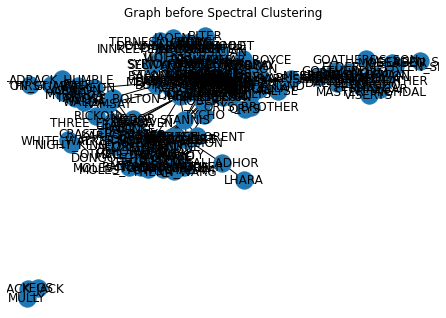

In [35]:
nx.draw(G, with_labels=True)
plt.title("Graph before Spectral Clustering")
plt.show()

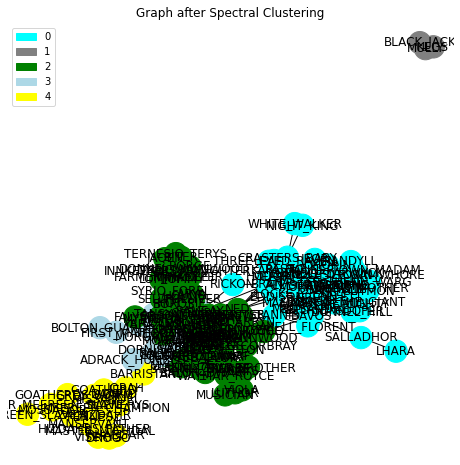

In [36]:
from scipy.sparse import coo_matrix
from scipy.sparse import coo_array



# Performing Spectral Clustering on the graph
k = 5
SpecClust = SpectralClustering(G)
SpecClust.fit(k)
clustering_labels = SpecClust.predict_labels()
# print(labels)

for i,node in enumerate(G.nodes()):
    G.nodes[node]['label'] = clustering_labels[i]

colour_map = ['']*len(clustering_labels)
for i, label in enumerate(clustering_labels):
    if label == 0:
        colour_map[i] = 'lightgreen'
    else:
        colour_map[i] = "red"

# nx.draw(CG, with_labels=True, node_color=colour_map)
SpecClust.plot_graph(k, title="Graph after Spectral Clustering")

<i>Analysis:<i>

After spectral clustering, we observe that clusters are being formed according to where the characters are present in the series, and how closely they interact. <br>
In order to visualize the graphs, we used Gephi and retreived the graphs as shown below: 

For example, we notice a cluster formed with characters on the other continent, Essos, where Daenerys marches her army towards Meereen, to free the Slave city with her dragons and trusted advisors (Jorah, Sir Barristen, etc).

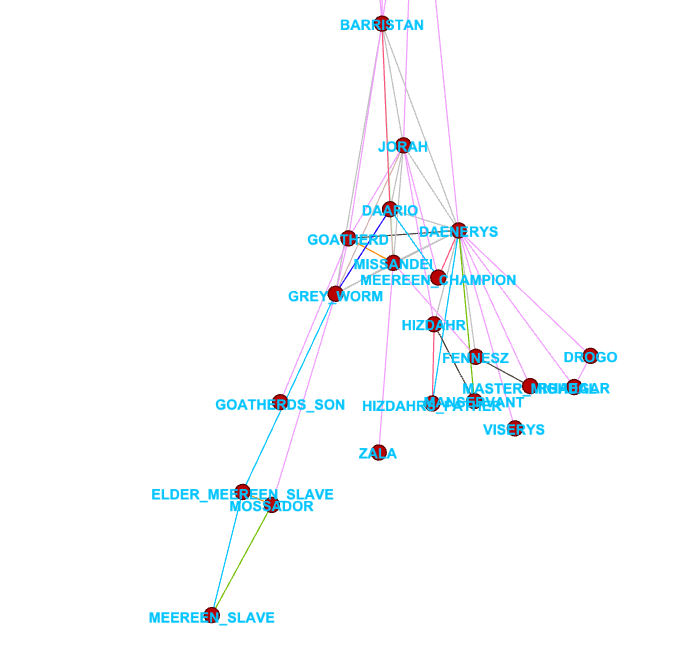

We see that there is a cluster formed  in the North, which contains the members of the Night’s Watch and the Wildlings (near the wall), as they interact closely. This cluster is denoted by a light green label.<br> Further, we see that there is a separate cluster formed for characters that go (and stay) outside the wall, like the White Walkers, the Night King, and Craster’s family. This also includes Hodor and Bran, etc as Bran meets the Three-eyed Raven outside the wall with the help of Hodor, Meera and Jojen. This cluster is denoted by a dark green label. <br>

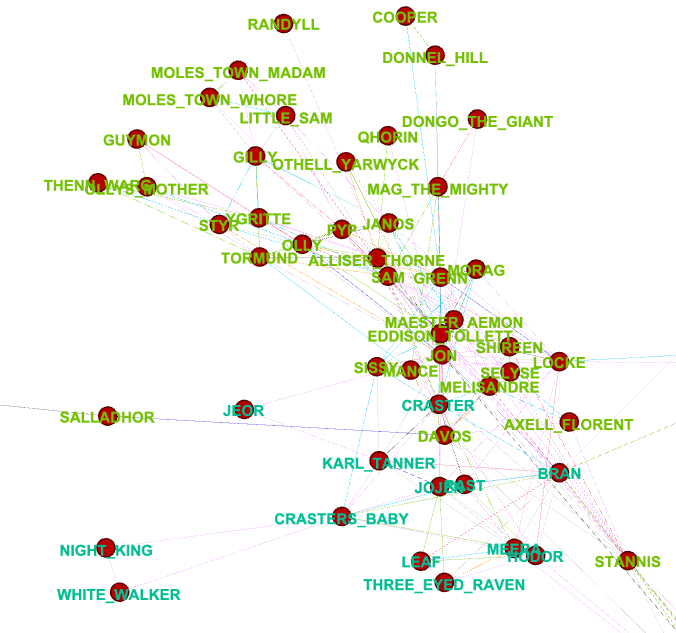

The biggest cluster observed consists of characters in King’s Landing, with all the members of the Lannister Family, and other characters central to the story, such as the Tyrell’s.

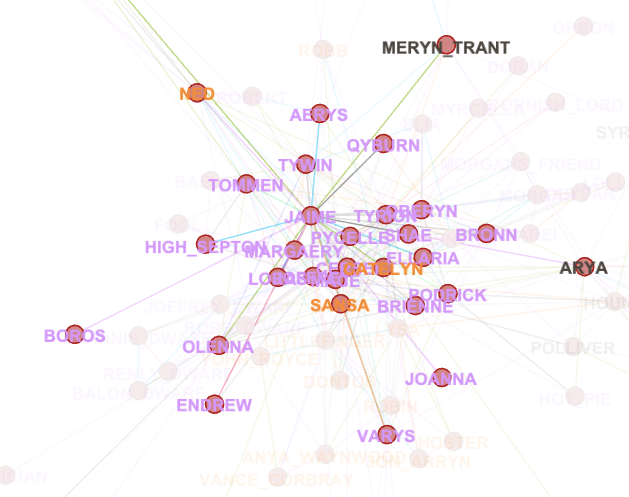

<b> 5) Link Prediction using Traditional Methods <b>

In [38]:
import pandas as pd 
df = pd.read_csv('got-s4-edges.csv')


G = nx.from_pandas_edgelist(df,
                            'Source',
                            'Target',
                             create_using=nx.Graph(),
                            edge_attr='Weight'# For Directed Route arrows
                           ) 
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes =", str(n))
print("Number of edges =", str(m))
print("Number of connected components =", str(nx.number_connected_components(G)))

Number of nodes = 172
Number of edges = 667
Number of connected components = 2


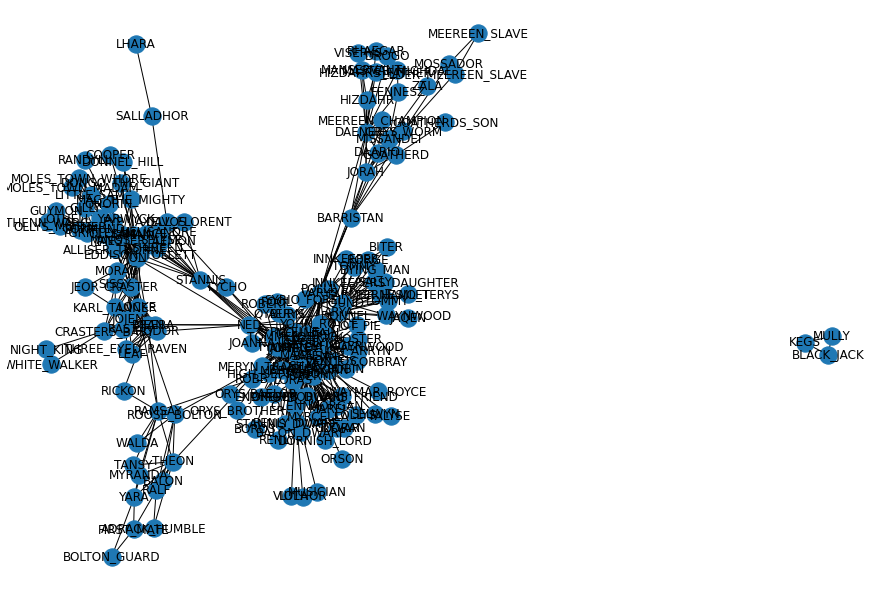

In [39]:
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels = True)

In [40]:
# take a random sample of edges

proportion_edges = 0.25
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# remove some edges. the goal is to try and repredict these edges, and measure how close the prediction is to the original.

G_train = G.copy()
G_train.remove_edges_from(edge_subset)

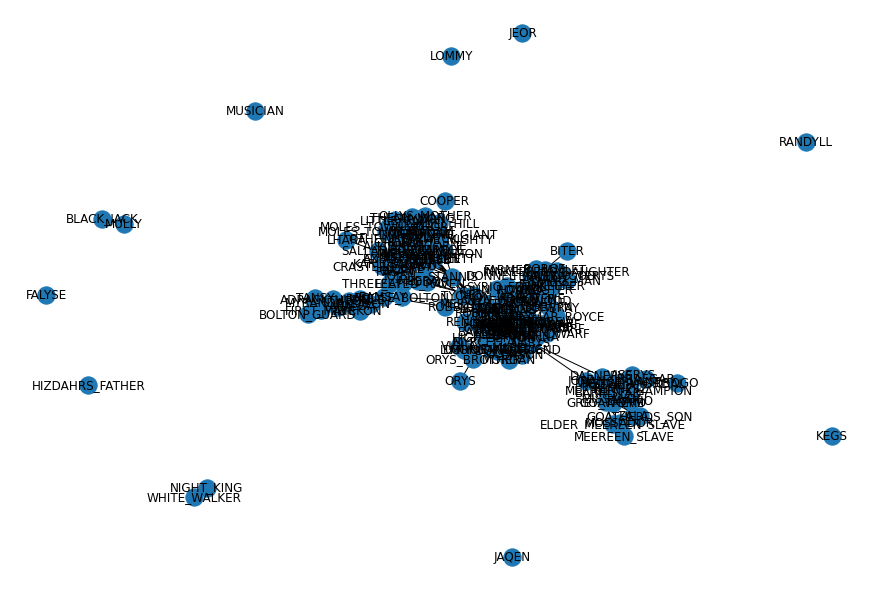

In [41]:
plt.figure(figsize=(12, 8))
nx.draw(G_train, with_labels = True)

In [42]:
edge_subset_size = len(list(edge_subset))
print("Deleted edges =", str(edge_subset_size))
print("Remaining edges =", str(m - edge_subset_size))

# just printing the edge_subset.
print(edge_subset)

Deleted edges = 166
Remaining edges = 501
[('ARYA', 'LOMMY'), ('JANOS', 'OTHELL_YARWYCK'), ('ARYA', 'NED'), ('ELLARIA', 'MAREI'), ('SANSA', 'JOFFREY_DWARF'), ('TYRION', 'MOUNTAIN'), ('PODRICK', 'BRIENNE'), ('STANNIS', 'AXELL_FLORENT'), ('JORAH', 'DAARIO'), ('JAIME', 'PODRICK'), ('JON', 'JEOR'), ('LITTLEFINGER', 'HOSTER'), ('LITTLEFINGER', 'LYSA'), ('JAIME', 'SHAE'), ('OBERYN', 'MORGAN'), ('JANOS', 'LITTLE_SAM'), ('BARRISTAN', 'VARYS'), ('STANNIS', 'MELISANDRE'), ('ALLISER_THORNE', 'PYP'), ('LITTLEFINGER', 'DONTOS'), ('DAVOS', 'MANCE'), ('CERSEI', 'MACE'), ('ARYA', 'FARMER_HAMLET'), ('ROOSE_BOLTON', 'WALDA'), ('TYWIN', 'BRONN'), ('GRENN', 'COOPER'), ('JOFFREY', 'ENDREW'), ('JON_ARRYN', 'HOSTER'), ('HOUND', 'INNKEEPER'), ('OLENNA', 'MUSICIAN'), ('JON', 'GRENN'), ('JOFFREY', 'MACE'), ('JAIME', 'CATELYN'), ('CERSEI', 'TYWIN'), ('HOUND', 'BITER'), ('STYR', 'THENN_WARG'), ('ARYA', 'CATELYN'), ('HOUND', 'BRIENNE'), ('BRONN', 'MORGAN'), ('TYWIN', 'LORAS'), ('SANSA', 'VARYS'), ('SANSA', 'CATELY

Jaccard Coefficient:

In [43]:
# calculating jaccard coefficient for all the node pairs in G_karate_train.

prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [44]:
# binary classification here. taking various thresholds for the jaccard coefficient.
# calculating fpr, tpr, and auc values for various thresholds of the jaccard coefficient.

fpr_jaccard, tpr_jaccard, thresholds_jaccard = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)

Adamic-Adar similarity:

In [45]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [46]:
fpr_adamic, tpr_adamic, thresholds_adamic = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

Preferential Attachment measure:

In [47]:
prediction_pref = list(nx.preferential_attachment(G_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

In [48]:
fpr_pref, tpr_pref, thresholds_pref = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

Plotting ROC-AUC Curve:

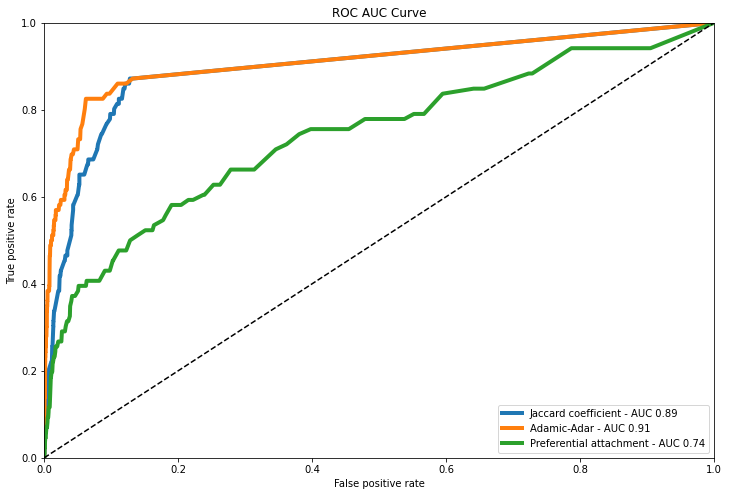

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

In [50]:
# the best performance coefficient might vary in some cases.
# however, in this particular case, it is clear from the auc, that *fill in* performs the best.
# now, find the threshold value at which adamic adar performs the best.

optimal_idx = np.argmax(tpr_pref - fpr_pref)
optimal_threshold = thresholds_pref[optimal_idx]
print("Optimal threshold =", optimal_threshold)

# this is the threshold value above which a link will be classified as existant, and below which a link will be classified as non-existant.

Optimal threshold = 44


<i> Analysis: <i>

Here, The jaccard coefficient divides the count of the common neighbor by the count of total neighbors. <br>
Whereas, The adamic/adar weighs the CN (common neighbor) with the smaller degree more heavily. <br>
And finally, preferential attachment technique provides the probability that node will be connected to the network

We find that the <b> Adamic-Adar </b> measure performs best with an AUC of <b><u>0.91</u></b>. This can be attributed to the fact that common neighbors with high global degree are less likely to be predictive of future links. Also, Adamic-Adar metric
improves Jaccard Coefficient by accounting for the nonlinear nature of the possible influence of proximity,
i.e., common neighbors, on the strength of connection. It also performs the best in precision.

<b> Link Prediction using GraphML <b>

In [ ]:
conda install pyg -c pyg

OSError: [WinError 127] The specified procedure could not be found

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = "cpu"

In [ ]:
# load the Cora dataset
#dataset = 'Cora'
#path = osp.join('.', 'data', dataset)
#dataset = Planetoid(path, dataset, transform=T.NormalizeFeatures())
##data = dataset[0]
#print(dataset.data)

def get_test_train_mask(p,n):
    train_samples=p*n
    test_samples=(1-p)*n
    tr=[]
    for i in range(0,n):
        if(i<train_samples):
            tr.append(True)
        else:
            tr.append(False)
    ts=[]
    for i in range(0,n):
        if(i>(n-test_samples)):
            ts.append(True)
        else:
            ts.append(False)
    return(torch.tensor(tr),torch.tensor(ts))
    

edge_df=pd.read_csv('got-s4-edges.csv')
G=nx.from_pandas_edgelist(edge_df,'Source','Target')
nodes = pd.read_csv('got-s4-nodes.csv')

node_encoder = OneHotEncoder()
node_fit=node_encoder.fit(nodes[['Id']])
encoded_nodes_df=np.array(node_fit.transform(nodes[['Id']]).toarray())

label_encoder = OneHotEncoder()
feature_fit=label_encoder.fit(nodes[['Label']])
encoded_nodes_labels=pd.DataFrame(feature_fit.transform(nodes[['Label']]).toarray())

nx.draw(G,with_labels=True)

data=from_networkx(G)
data.x=torch.tensor(encoded_nodes_df,dtype=torch.float)
data.y=torch.tensor(list(encoded_nodes_labels),dtype=torch.long)
data.edge_weight=torch.tensor(edge_df['Weight'])
#msk=masking(split="random", num_splits = 1, num_val = 0.3, num_test= 0.6)
#data=msk(data)
#data.train_mask,data.test_mask=get_test_train_mask(0.7,data.num_nodes)

print(data)

In [ ]:
# use train_test_split_edges to create neg and positive edges
data.train_mask = data.val_mask = data.test_mask = data.y = None
data = train_test_split_edges(data)
print(data)

In [ ]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(172, 128)
        self.conv2 = GCNConv(128, 64)

    def encode(self):
        x = self.conv1(data.x, data.train_pos_edge_index) # convolution 1
        x = x.relu()
        return self.conv2(x, data.train_pos_edge_index) # convolution 2

    def decode(self, z, pos_edge_index, neg_edge_index): # only pos and neg edges
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1) # concatenate pos and neg edges
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=-1)  # dot product 
        return logits

    def decode_all(self, z): 
        prob_adj = z @ z.t() # get adj NxN
        return (prob_adj > 0).nonzero(as_tuple=False).t() # get predicted edge_list 
class SageNet(torch.nn.Module):
    def __init__(self):
        super(SageNet, self).__init__()
        self.conv1 = SAGEConv(172, 128)
        self.conv2 = SAGEConv(128, 64)

    def encode(self):
        x = self.conv1(data.x, data.train_pos_edge_index) # convolution 1
        x = x.relu()
        return self.conv2(x, data.train_pos_edge_index) # convolution 2

    def decode(self, z, pos_edge_index, neg_edge_index): # only pos and neg edges
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1) # concatenate pos and neg edges
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=-1)  # dot product 
        return logits

    def decode_all(self, z): 
        prob_adj = z @ z.t() # get adj NxN
        return (prob_adj > 0).nonzero(as_tuple=False).t() # get predicted edge_list 

class GATNet(torch.nn.Module):
    def __init__(self):
        super(GATNet, self).__init__()
        self.conv1 = GATConv(172, 128)
        self.conv2 = GATConv(128, 64)

    def encode(self):
        x = self.conv1(data.x, data.train_pos_edge_index) # convolution 1
        x = x.relu()
        return self.conv2(x, data.train_pos_edge_index) # convolution 2

    def decode(self, z, pos_edge_index, neg_edge_index): # only pos and neg edges
        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1) # concatenate pos and neg edges
        logits = (z[edge_index[0]] * z[edge_index[1]]).sum(dim=-1)  # dot product 
        return logits

    def decode_all(self, z): 
        prob_adj = z @ z.t() # get adj NxN
        return (prob_adj > 0).nonzero(as_tuple=False).t() # get predicted edge_list 

In [ ]:

model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [ ]:


def get_link_labels(pos_edge_index, neg_edge_index):
    # returns a tensor:
    # [1,1,1,1,...,0,0,0,0,0,..] with the number of ones is equel to the lenght of pos_edge_index
    # and the number of zeros is equal to the length of neg_edge_index
    E = pos_edge_index.size(1) + neg_edge_index.size(1)
    link_labels = torch.zeros(E, dtype=torch.float, device=device)
    link_labels[:pos_edge_index.size(1)] = 1.
    return link_labels


def train():
    model.train()

    neg_edge_index = negative_sampling(
        edge_index=data.train_pos_edge_index, #positive edges
        num_nodes=data.num_nodes, # number of nodes
        num_neg_samples=data.train_pos_edge_index.size(1)) # number of neg_sample equal to number of pos_edges

    optimizer.zero_grad()
    
    z = model.encode() #encode
    link_logits = model.decode(z, data.train_pos_edge_index, neg_edge_index) # decode
    
    link_labels = get_link_labels(data.train_pos_edge_index, neg_edge_index)
    loss = F.binary_cross_entropy_with_logits(link_logits, link_labels)
    loss.backward()
    optimizer.step()

    return loss


@torch.no_grad()
def test():
    model.eval()
    perfs = []
    for prefix in ["val", "test"]:
        pos_edge_index = data[f'{prefix}_pos_edge_index']
        neg_edge_index = data[f'{prefix}_neg_edge_index']

        z = model.encode() # encode train
        link_logits = model.decode(z, pos_edge_index, neg_edge_index) # decode test or val
        link_probs = link_logits.sigmoid() # apply sigmoid
        
        link_labels = get_link_labels(pos_edge_index, neg_edge_index) # get link
        
        perfs.append(roc_auc_score(link_labels.cpu(), link_probs.cpu())) #compute roc_auc score
    if(epoch==100):
        fpr, tpr, thresholds = roc_curve(link_labels.cpu(), link_probs.cpu())
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic for GCN')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    return perfs


In [ ]:
import matplotlib.pyplot as plt
loss=[]
best_val_perf = test_perf = 0
for epoch in range(1, 101):
    train_loss = train()
    loss.append(train_loss)
    val_perf, tmp_test_perf = test()
    if val_perf > best_val_perf:
        best_val_perf = val_perf
        test_perf = tmp_test_perf
    log = 'Epoch: {:03d}, Loss: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    if epoch % 10 == 0:
        print(log.format(epoch, train_loss, best_val_perf, test_perf))



In [ ]:
model, data = SageNet().to(device), data.to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

def get_link_labels(pos_edge_index, neg_edge_index):
    # returns a tensor:
    # [1,1,1,1,...,0,0,0,0,0,..] with the number of ones is equel to the lenght of pos_edge_index
    # and the number of zeros is equal to the length of neg_edge_index
    E = pos_edge_index.size(1) + neg_edge_index.size(1)
    link_labels = torch.zeros(E, dtype=torch.float, device=device)
    link_labels[:pos_edge_index.size(1)] = 1.
    return link_labels


def train():
    model.train()

    neg_edge_index = negative_sampling(
        edge_index=data.train_pos_edge_index, #positive edges
        num_nodes=data.num_nodes, # number of nodes
        num_neg_samples=data.train_pos_edge_index.size(1)) # number of neg_sample equal to number of pos_edges

    optimizer.zero_grad()
    
    z = model.encode() #encode
    link_logits = model.decode(z, data.train_pos_edge_index, neg_edge_index) # decode
    
    link_labels = get_link_labels(data.train_pos_edge_index, neg_edge_index)
    loss = F.binary_cross_entropy_with_logits(link_logits, link_labels)
    loss.backward()
    optimizer.step()

    return loss


@torch.no_grad()
def test():
    model.eval()
    perfs = []
    for prefix in ["val", "test"]:
        pos_edge_index = data[f'{prefix}_pos_edge_index']
        neg_edge_index = data[f'{prefix}_neg_edge_index']

        z = model.encode() # encode train
        link_logits = model.decode(z, pos_edge_index, neg_edge_index) # decode test or val
        link_probs = link_logits.sigmoid() # apply sigmoid
        
        link_labels = get_link_labels(pos_edge_index, neg_edge_index) # get link
        
        perfs.append(roc_auc_score(link_labels.cpu(), link_probs.cpu())) #compute roc_auc score
    if(epoch==100):
        fpr, tpr, thresholds = roc_curve(link_labels.cpu(), link_probs.cpu())
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic for GraphSage')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    return perfs

import matplotlib.pyplot as plt
losses=[]
best_val_perf = test_perf = 0
for epoch in range(1, 101):
    train_loss = train()
    losses.append(train_loss)
    val_perf, tmp_test_perf = test()
    if val_perf > best_val_perf:
        best_val_perf = val_perf
        test_perf = tmp_test_perf
    log = 'Epoch: {:03d}, Loss: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    if epoch % 10 == 0:
        print(log.format(epoch, train_loss, best_val_perf, test_perf))

model, data = GATNet().to(device), data.to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

def get_link_labels(pos_edge_index, neg_edge_index):
    # returns a tensor:
    # [1,1,1,1,...,0,0,0,0,0,..] with the number of ones is equel to the lenght of pos_edge_index
    # and the number of zeros is equal to the length of neg_edge_index
    E = pos_edge_index.size(1) + neg_edge_index.size(1)
    link_labels = torch.zeros(E, dtype=torch.float, device=device)
    link_labels[:pos_edge_index.size(1)] = 1.
    return link_labels


def train():
    model.train()

    neg_edge_index = negative_sampling(
        edge_index=data.train_pos_edge_index, #positive edges
        num_nodes=data.num_nodes, # number of nodes
        num_neg_samples=data.train_pos_edge_index.size(1)) # number of neg_sample equal to number of pos_edges

    optimizer.zero_grad()
    
    z = model.encode() #encode
    link_logits = model.decode(z, data.train_pos_edge_index, neg_edge_index) # decode
    
    link_labels = get_link_labels(data.train_pos_edge_index, neg_edge_index)
    loss = F.binary_cross_entropy_with_logits(link_logits, link_labels)
    loss.backward()
    optimizer.step()

    return loss

au=[]
fpr,tpr,thresholds=None,None,None

@torch.no_grad()
def test():
    model.eval()
    perfs = []
    for prefix in ["val", "test"]:
        pos_edge_index = data[f'{prefix}_pos_edge_index']
        neg_edge_index = data[f'{prefix}_neg_edge_index']

        z = model.encode() # encode train
        link_logits = model.decode(z, pos_edge_index, neg_edge_index) # decode test or val
        link_probs = link_logits.sigmoid() # apply sigmoid
        
        link_labels = get_link_labels(pos_edge_index, neg_edge_index) # get link
        
        perfs.append(roc_auc_score(link_labels.cpu(), link_probs.cpu())) #compute roc_auc score
        au.append(roc_auc_score(link_labels.cpu(), link_probs.cpu()))
    if(epoch==100):
        fpr, tpr, thresholds = roc_curve(link_labels.cpu(), link_probs.cpu())
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic for GAT')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
    return perfs

import matplotlib.pyplot as plt
lossess=[]
bvf=[]
best_val_perf = test_perf = 0
epoch=None
for epoch in range(1, 101):
    train_loss = train()
    lossess.append(train_loss)
    val_perf, tmp_test_perf = test()
    if val_perf > best_val_perf:
        best_val_perf = val_perf
        test_perf = tmp_test_perf
    log = 'Epoch: {:03d}, Loss: {:.4f}, Val: {:.4f}, Test: {:.4f}'
    if epoch % 10 == 0:
        print(log.format(epoch, train_loss, best_val_perf, test_perf))

loss=[x.detach().item() for x in loss]
losses=[x.detach().item() for x in losses]
lossess=[x.detach().item() for x in lossess]


In [ ]:
plt.title('Loss comparison')
plt.plot(loss,label="GCN")
plt.plot(losses,label="GraphSAGE")
plt.plot(lossess,label="GAT")
plt.legend(loc="upper right")
plt.show()

On <u>comparing the loss</u> as show in the plot above, we find that <b><u>GraphSage</u></b> gives the least loss whereas <b><u>GAT</u></b> gives the highest loss. 

In [ ]:
z = model.encode()
final_edge_index = model.decode_all(z)

In [ ]:
import numpy as np
arr=list(final_edge_index.numpy()[1])


In [ ]:
file=open("output.txt","w+")
file.write(str(arr))
file.close()

<i> Analysis: <i>

We find that <b> GCN </b> performs the better than GAT with an <b>AUC</b> of <b><u>0.94</u></b>. <br>
This can be attributed to the fact that GAT use more information besides the graph structure to determine each node’s “importance”. As we lack node features, our GAT model is not as effective/suitable. 

<b> 7) Perform a comparison between traditional and GraphML <b>

<i> a) What are the metrics? <i>

<b><u> AUC metrics in the Traditional Models:</b></u><br>
Jaccard: 0.89  <br>
Adamic Adar: 0.91 <br> 
Preferential Attachment: 0.74 

<b><u> AUC metrics in the GraphML Models:</b></u><br>
GCN: 0.94  <br>
GraphSage: 0.90 <br> 
GAT: 0.91 

<i> b) Which is performing better? Is there any reason you can think of, as to why
this might be happening?

We find that the <b>GraphML models perform better</b>. <br>Graphs are permutation-invariant, which means they are unaffected by the order of neighbour nodes, which is a significant distinction from standard deep neural networks. There are no set standards for how the nodes should be arranged. Graphs are reliant on the application. In node-wise problems, for example, specific node attributes, such as spammers in a network, are predicted. In graph-wise problems, however, predictions are provided for the entire graph.<br>  Using GraphML, we can create functions to spot recurring patterns. It can also learn information on a scale traditional analysis methods cannot.

<i> c) Any analysis or insights you can draw from this, that may relate to the
season’s plot?


We observe that the link prediction models have been accurately able to predict some of the future interactions between the characters. (in the later seasons)<br>
For example, one of the links predicted was Tyrion-Jorah which proved to be correct as in season 5, Jorah kidnaps Tyrion to take him to meet Danerys.